In [1]:
import matplotlib
import matplotlib.pyplot as plt
import mrlattice.lattice as lat
import numpy as np

In [2]:
# this notebook requires mrlattice version:
VERSION = "0.1.0"

In [3]:
%run prepare_notebook.ipynb

The following names are now available:

<class '__main__.LatticeArrayPlotWidget'>


In [4]:
%load_ext jupyter_spaces

In [5]:
# interactive plots in notebook
# %matplotlib notebook
# open external window with plot
# %matplotlib qt
# for saving widget state
%matplotlib inline

if "inline" in matplotlib.get_backend():
    plt.rcParams["figure.figsize"] = (14, 14)
else:
    plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

# Summary

We establish a new OOP design for the `LatticeArray` and demonstrate its early usage with diagonal borders lattice examples. We also discuss a new approach to visualization and manipulation within the notebooks via the custom `LatticeArrayPlotWidget` ipywidget.


# Setting up a new interface

In continuation to the parts `0-X` of this notebook series we take a few steps back and reformulate our previous results in terms of a proper OOP interface. The goals are not only to allow for clean notebooks, where only the code that matters for the current aspect under discussion is explicitly shown. But also extend to good quality code, that (hopefully) is easy to understand, expand upon and maintain going forward.

We introduce the new `mrlattice` Python package. It contains several modules, from which the `mrlattice.lattice` module defines the `LatticeArray` and the `mrlattice.plotting` module provides the plotting routines.

As part of this package we also move to a release driven development. Release 0.0.1 marks all the previous code and notebooks. This notebook, together with the initial OOP setup is part of 0.1.0.


## `prepare_notebook.ipynb`

In order to reduce duplicate code when setting up the ipywidgets and plot output, we provide a special notebook `prepare_notebook.ipynb`. This notebook is designed to be imported using the magic command `%run prepare_notebook.ipynb`. It checks if the version of `mrlattice` required by the importing notebook, that is saved in the global `VERSION` variable, matches the installed version of `mrlattice`. It also contains the definition of the `LatticeArrayPlotWidget` which is a custom ipywidget preconfigured for our use.

## Diagonal Borders Lattice Revisit

The lattices plotted in this section are very basic with only diagonal borders from the bottom left to the top right. Only a single segment of such a lattice is shown. The coarsest resolution cells are not shown and would be the size of four of the coarsest shown cells combined. These limitations are not reflected by the options displayed by the widget.  
As of 0.1.0, these are the only lattices available from our previous results.

The options for the plot widget are taken from our previous notebooks. We have a slider for all the configurable properties with descriptions that now update based on the selected scheme. There is also an additional description displayed for the selected scheme. We added an input box for the slider values as well. We still have the checkbox for the black mesh on alpha background option and the option for plotting isolated lattices before superposition. We no longer have the option to select double cell tips (from now on all lattices will enforce double cell tips implicitly) and replaced that checkbox with the option to plot a lattice resulting from superimposing the configured lattice with its mirrored counterpart. For now only the first two sliders, the scheme and the first checkbox are hooked up.

When changing a value on the widgets, the changes propagate to the `LatticeArray`. Pressing the "Plot Lattice" button just calls `.generate_array()` on the `LatticeArray` and uses our existing functions to convert that array to a plottable Numpy array and plot it.

LatticeArrayPlotWidget(children=(VBox(children=(HBox(children=(VBox(children=(Label(value='Number of Borders b…

Output()

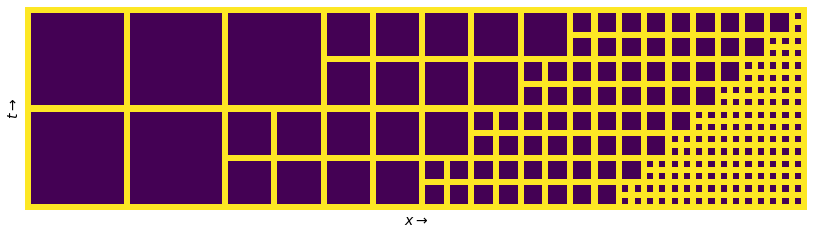

In [6]:
LatticeArrayPlotWidget()

It is also possible to pass an existing `LatticeArray` to the widget constructor that is preconfigured, or change the values of the widget after creation with code. Changes to the `LatticeArray` after passing it to the plot widget will not be reflected by the widget and will lead to unknown behavior.

LatticeArrayPlotWidget(children=(VBox(children=(HBox(children=(VBox(children=(Label(value='Number of Borders b…

Output()

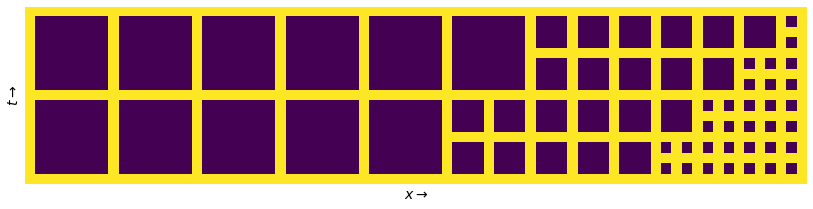

In [7]:
LatticeArrayPlotWidget(
    lattice=lat.LatticeArray(
        scheme=lat.configure.LatticeArrayScheme.FIXED_NUMBER_SCHEME,
        borders_width=5,
        coarse_steps=3,
))

LatticeArrayPlotWidget(children=(VBox(children=(HBox(children=(VBox(children=(Label(value='Number of Borders b…

Output()

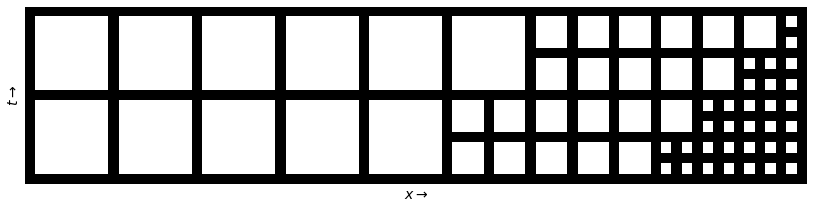

In [8]:
w = LatticeArrayPlotWidget()
w.scheme.value = lat.configure.LatticeArrayScheme.FIXED_NUMBER_SCHEME
w.coarse_steps_slider.value = 3
w.borders_width_slider.value = 5
w.alpha_bg.value = True
display(w)

## Testing `LatticeArrayPlotWidget`

Below follow a set of unit test style tests to check for exceptions raised by `LatticeArrayPlotWidget`.

In [9]:
import unittest

class TestPlotWidget(unittest.TestCase):
    
    def setUp(self):
        self.A = lat.LatticeArray()
    
    def test_unknown_scheme(self):
        self.A.scheme._scheme = "non-existent"
        with self.assertRaises(lat.configure.ConfigurationError):
            LatticeArrayPlotWidget(lattice=self.A)
    
    def test_invalid_max_vals(self):
        with self.assertRaises(lat.configure.ConfigurationError):
            LatticeArrayPlotWidget(lattice=self.A, max_vals={"none": 0})
        
    def test_update_max_vals(self):
        w = LatticeArrayPlotWidget(lattice=self.A)
        with self.assertRaises(KeyError):
            w._update_slider_max_vals(w.repeat_slider)
            
        
unittest.main(argv=[__name__], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.106s

OK
